## Olympics Analysis 1980 - 2016

In [23]:
# Import Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly 
import plotly.express as px
import plotly.graph_objects as go

In [24]:
# Create a path to the csv and read it into a Pandas DataFrame
olympic_path = "athlete_events.csv"
noc_path = "noc_regions.csv"

olympicdata = pd.read_csv(olympic_path)
noc_data = pd.read_csv(noc_path)

merged_data = olympicdata.merge(noc_data, on='NOC', how='left')
merged_data.to_csv("output_data/merged_data.csv", index_label="ID")

filtered_data = merged_data[merged_data['Year'] >= 1980]
filtered_data.to_csv("output_data/filtered_data.csv", index_label="ID")

filtered_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Participation by Athletes

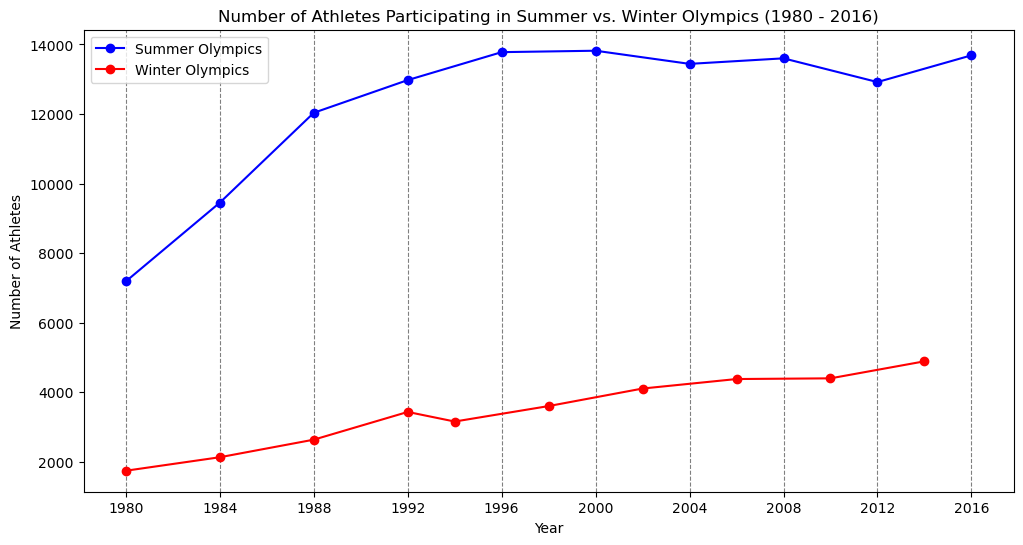

In [25]:
# Group by Year and Season to get the number of athletes participating in Summer vs. Winter Olympics
athletes_per_season = filtered_data.groupby(['Year', 'Season']).size().reset_index(name='Number of Athletes')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot Summer Olympics data
summer_data = athletes_per_season[athletes_per_season['Season'] == 'Summer']
plt.plot(summer_data['Year'], summer_data['Number of Athletes'], label='Summer Olympics', color='blue', marker='o')

# Plot Winter Olympics data
winter_data = athletes_per_season[athletes_per_season['Season'] == 'Winter']
plt.plot(winter_data['Year'], winter_data['Number of Athletes'], label='Winter Olympics', color='red', marker='o')

# Add titles and labels
plt.title('Number of Athletes Participating in Summer vs. Winter Olympics (1980 - 2016)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')

# Set x-axis ticks to every 4 years
plt.xticks(range(1980, athletes_per_season['Year'].max() + 1, 4))

# Add gridlines with the specified x-ticks
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
plt.savefig("output_data/fig1.png")

# Display the plot
plt.show()

## Participation by Country

In [26]:
Olympicsfrom1980 = olympicdata[(olympicdata['Year'] >= 1980) & (olympicdata['Year'] <= 2016)]
Olympicsfrom1980_Summer = Olympicsfrom1980[Olympicsfrom1980['Season'] == 'Summer']
summer_gold_medals_df = (Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Gold'])
summer_silver_medals_df = (Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Silver'])
summer_bronze_medals_df = (Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Bronze'])
Olympicsfrom1980_Winter = Olympicsfrom1980[Olympicsfrom1980['Season'] == 'Winter']
winter_gold_medals_df =  (Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Gold'])
winter_silver_medals_df =  (Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Silver'])
winter_bronze_medals_df =  (Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Bronze'])
country_counts_Summer = Olympicsfrom1980_Summer['NOC'].value_counts().reset_index()
country_counts_Summer.columns = ['NOC', 'Summer Entries']
country_counts_Winter = Olympicsfrom1980_Winter['NOC'].value_counts().reset_index()
country_counts_Winter.columns = ['NOC', 'Winter Entries']

Summer_Winter_Participation = pd.merge(country_counts_Summer, country_counts_Winter, on='NOC', how='outer')
Summer_Winter_Participation.fillna(0, inplace=True)
Summer_Winter_Participation = Summer_Winter_Participation.astype({'Summer Entries': int, 'Winter Entries': int})
Summer_Winter_Participation['Total'] = Summer_Winter_Participation['Summer Entries'] + Summer_Winter_Participation['Winter Entries']
Summer_Winter_Participation
Top_Participating_Countries = Summer_Winter_Participation.sort_values(by='Total', ascending=False).head(20)
Top_Participating_Countries

Top_20_Country_Participation = {
    'Country': ['USA', 'CAN', 'ITA', 'GER', 'FRA', 'GBR', 'AUS', 'JPN', 'CHN','RUS', 'ESP', 'KOR', 'SWE', 'POL', 'NED', 'BRA', 'SUI', 'HUN','ROU', 'UKR'],
    'Total Entries': [9251, 6046, 5778, 5688, 5683, 5284, 5213, 5177, 5040,4862,3906,3822,3482,3165,2920,2908,2883,2776,2611,2559],
    'Latitude': [37.0902, 56.1304, 41.8719, 51.1657, 46.6034, 55.3781, -25.2744, 36.2048, 35.8617, 61.5240, 40.4637, 35.9078, 60.1282, 51.9194, 52.3676, -14.2350, 46.8182, 47.1625, 45.9432, 48.3794],
    'Longitude': [-95.7129, -106.3468, 12.5674, 10.4515, 1.8883, -3.4360, 133.7751, 138.2529, 104.1954, 105.3188, -3.7492, 127.7669, 18.6435, 19.1451, 4.9041, -51.9253, 8.2275, 19.5033, 24.9668, 31.1656]
}
WorldMap_Particpation = pd.DataFrame(Top_20_Country_Participation)

# Plotly scattermapbox
fig = go.Figure(go.Scattermapbox(
    lat=WorldMap_Particpation['Latitude'],
    lon=WorldMap_Particpation['Longitude'],
    mode='markers+text',
    text=WorldMap_Particpation['Country'] + ': ' + WorldMap_Particpation['Total Entries'].astype(str),
    textposition='top right',
    marker=dict(
        size=10, 
        color=WorldMap_Particpation['Total Entries'], 
        colorscale='Viridis', 
        showscale=True
    )
))

# Update layout for the map
fig.update_layout(
    title='Summer and Winter Entries by Country',
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=0, lon=0),
        zoom=1
    ),
    showlegend=False
)

# Show the plot
fig.show()

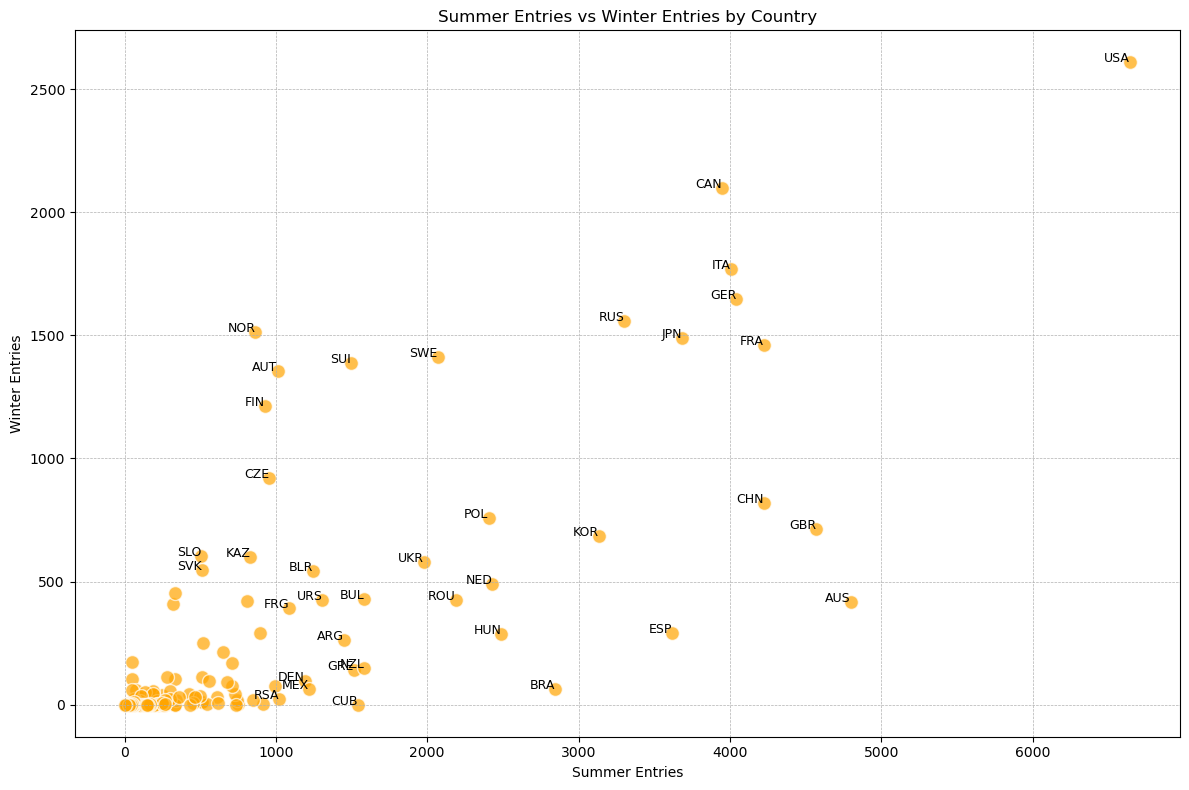

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(Summer_Winter_Participation['Summer Entries'], 
            Summer_Winter_Participation['Winter Entries'], 
            alpha=0.7, 
            edgecolors='w', 
            s=100, 
            c='orange')

# Add labels and title
plt.xlabel('Summer Entries')
plt.ylabel('Winter Entries')
plt.title('Summer Entries vs Winter Entries by Country')

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Filter countries with more than 500 entries in either Summer or Winter
mask = (Summer_Winter_Participation['Summer Entries'] > 1000) | (Summer_Winter_Participation['Winter Entries'] > 500)

# Annotate the points with country codes if they meet the criteria
for i in Summer_Winter_Participation[mask].index:
    plt.annotate(Summer_Winter_Participation['NOC'].iloc[i], 
                 (Summer_Winter_Participation['Summer Entries'].iloc[i], 
                  Summer_Winter_Participation['Winter Entries'].iloc[i]), 
                 fontsize=9, 
                 ha='right')

plt.tight_layout()
plt.savefig("output_data/fig3.png")
plt.show()

## Participation by Gender

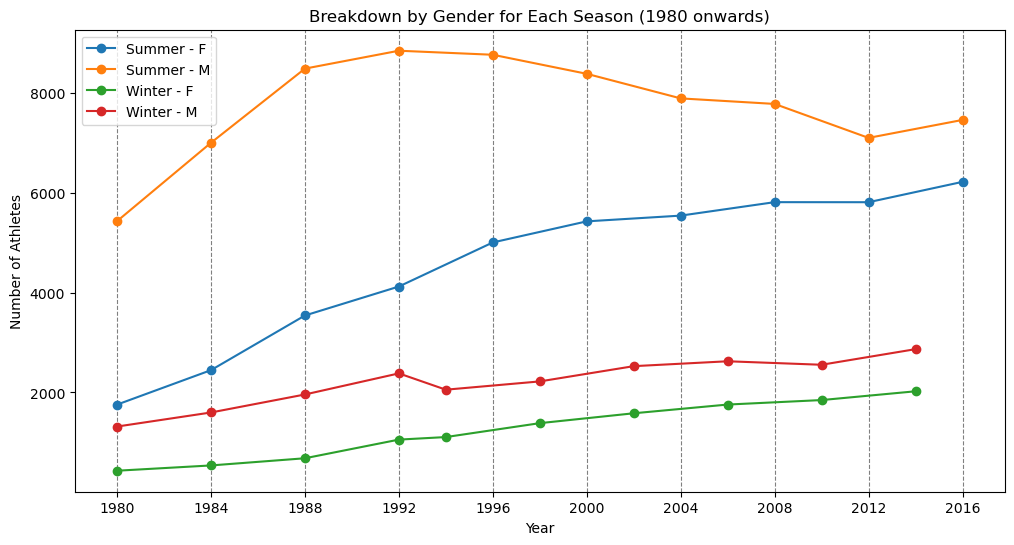

In [28]:
# Group by Year, Season, and Sex to get the breakdown by gender for each season
gender_breakdown = filtered_data.groupby(['Year', 'Season', 'Sex']).size().reset_index(name='Number of Athletes')

# Create a figure
plt.figure(figsize=(12, 6))

# Plot data for each combination of Season and Sex
for (season, sex), group_data in gender_breakdown.groupby(['Season', 'Sex']):
    plt.plot(group_data['Year'], group_data['Number of Athletes'], 
             label=f'{season} - {sex}', marker='o')

# Add titles and labels
plt.title('Breakdown by Gender for Each Season (1980 onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')

# Set x-axis ticks to every 4 years
plt.xticks(range(1980, gender_breakdown['Year'].max() + 1, 4))

# Add gridlines with the specified x-ticks
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')

# Display the plot
plt.savefig("output_data/fig4.png")
plt.show()

## Participating Athletes Age, Height and Weight Analysis

In [29]:
# The number of entries for each season
season_counts = filtered_data['Season'].value_counts()
print("Number of entries by Season:")
season_counts.to_csv("output_data/season_counts.csv", index_label="Season")
print(season_counts)

# The average values to see if they are the same
average_physical_attributes = filtered_data.groupby('Season')[['Height', 'Weight']].mean()
print("\nAverage Height and Weight by Season:")
average_physical_attributes.to_csv("output_data/average_physical_attributes.csv", index_label="Season")
print(average_physical_attributes)

# If there are any NaN values in Height and Weight columns
nan_values = filtered_data[['Season', 'Height', 'Weight']].isna().sum()
print("\nNumber of NaN values in Height and Weight columns:")
print(nan_values)

Number of entries by Season:
Season
Summer    122913
Winter     34504
Name: count, dtype: int64

Average Height and Weight by Season:
            Height     Weight
Season                       
Summer  176.001300  70.957421
Winter  174.969206  70.966727

Number of NaN values in Height and Weight columns:
Season       0
Height    8147
Weight    8590
dtype: int64


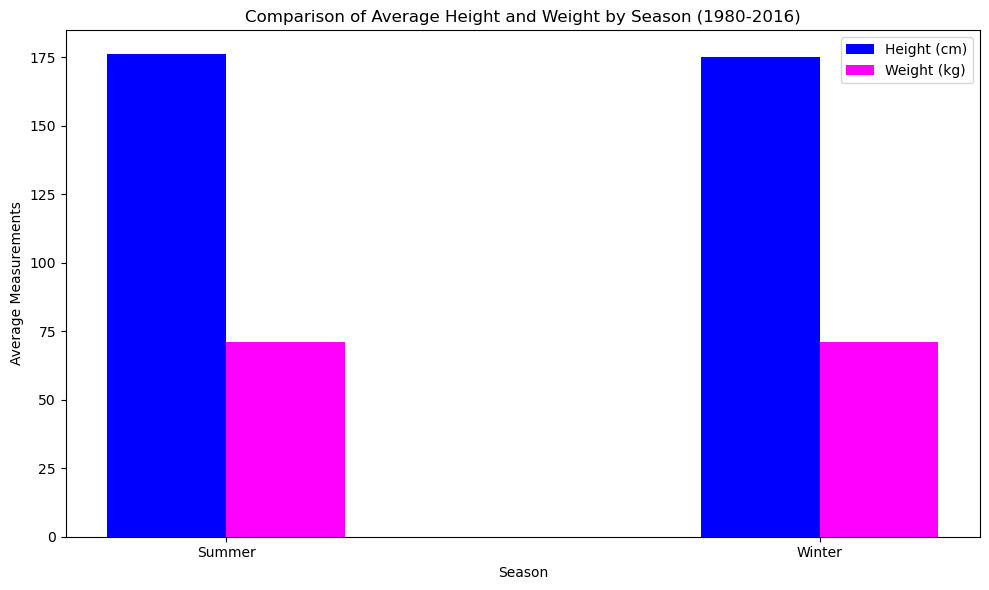

In [30]:
# Position of the bars
bar_width = 0.2
index = range(len(average_physical_attributes))

# Plot Average Height
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, average_physical_attributes['Height'], bar_width, label='Height (cm)', color='blue')

# Plot Average Weight next to the Average Height
bar2 = ax.bar([i + bar_width for i in index], average_physical_attributes['Weight'], bar_width, label='Weight (kg)', color='magenta')

ax.set_xlabel('Season')
ax.set_ylabel('Average Measurements')
ax.set_title('Comparison of Average Height and Weight by Season (1980-2016)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(average_physical_attributes.index)
ax.legend()

# Show the plot
plt.savefig("output_data/fig5.png")
plt.tight_layout()
plt.show()

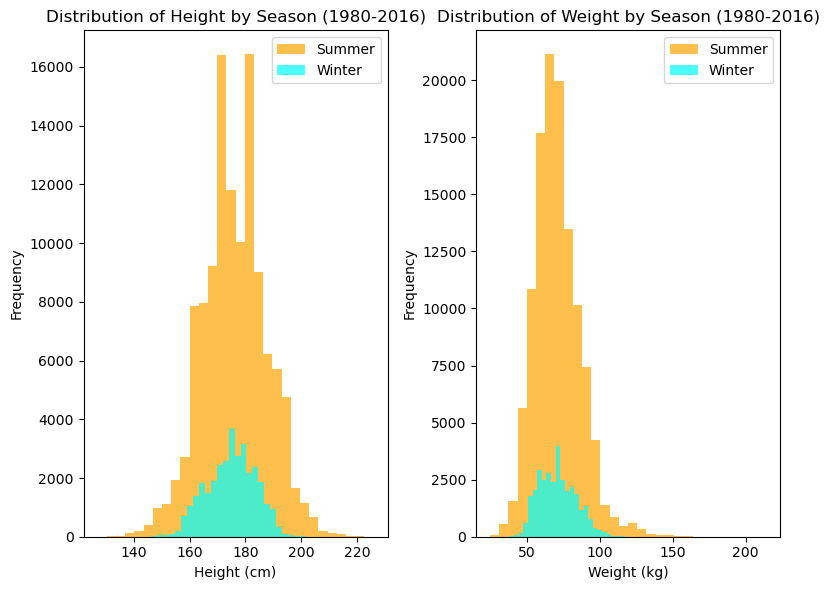

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [31]:
# Calculating the Average Height and Weight by Season
average_physical_attributes = filtered_data.groupby('Season')[['Height', 'Weight']].mean()
plt.figure(figsize=(8, 6))
# Distribution of Height
plt.subplot(1, 2, 1)
plt.hist(filtered_data[filtered_data['Season'] == 'Summer']['Height'].dropna(), bins=30, alpha=0.7, label='Summer', color='orange')
plt.hist(filtered_data[filtered_data['Season'] == 'Winter']['Height'].dropna(), bins=30, alpha=0.7, label='Winter', color='cyan')
plt.title('Distribution of Height by Season (1980-2016)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()

# Distribution of Weight
plt.subplot(1, 2, 2)
plt.hist(filtered_data[filtered_data['Season'] == 'Summer']['Weight'].dropna(), bins=30, alpha=0.7, label='Summer', color='orange')
plt.hist(filtered_data[filtered_data['Season'] == 'Winter']['Weight'].dropna(), bins=30, alpha=0.7, label='Winter', color='cyan')
plt.title('Distribution of Weight by Season (1980-2016)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.savefig("output_data/fig6.png")
plt.show()

plt.figure(figsize=(8, 6))

Average Age by Season:
Season
Summer    25.128651
Winter    25.129484
Name: Age, dtype: float64


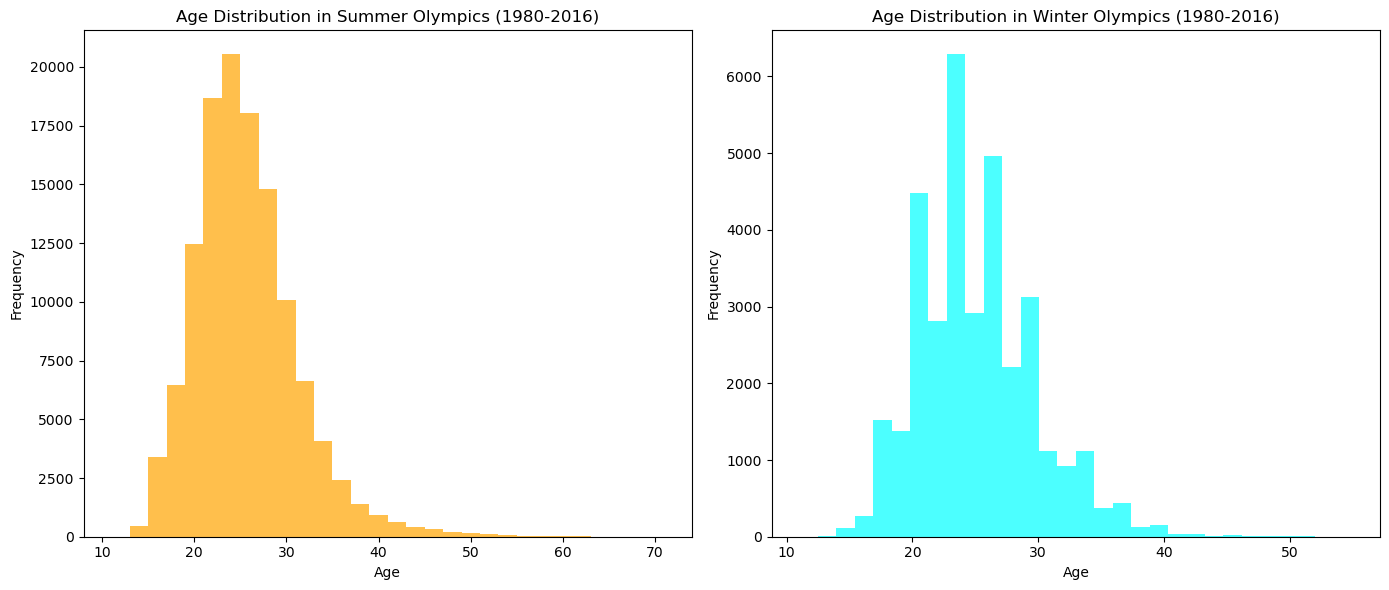

In [32]:
# Calculating the Average Age by Season
average_age_by_season = filtered_data.groupby('Season')['Age'].mean()
print("Average Age by Season:")
average_age_by_season.to_csv("output_data/average_age_by_season.csv", index_label="Season")
print(average_age_by_season)

# Distribution Histograms
plt.figure(figsize=(14, 6))

# Histogram for Age in Summer Olympics
plt.subplot(1, 2, 1)
plt.hist(filtered_data[filtered_data['Season'] == 'Summer']['Age'].dropna(), bins=30, alpha=0.7, label='Summer', color='orange')
plt.title('Age Distribution in Summer Olympics (1980-2016)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Age in Winter Olympics
plt.subplot(1, 2, 2)
plt.hist(filtered_data[filtered_data['Season'] == 'Winter']['Age'].dropna(), bins=30, alpha=0.7, label='Winter', color='cyan')
plt.title('Age Distribution in Winter Olympics (1980-2016)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("output_data/fig7.png")

plt.tight_layout()
plt.show()

## New Vs Returning Athletes

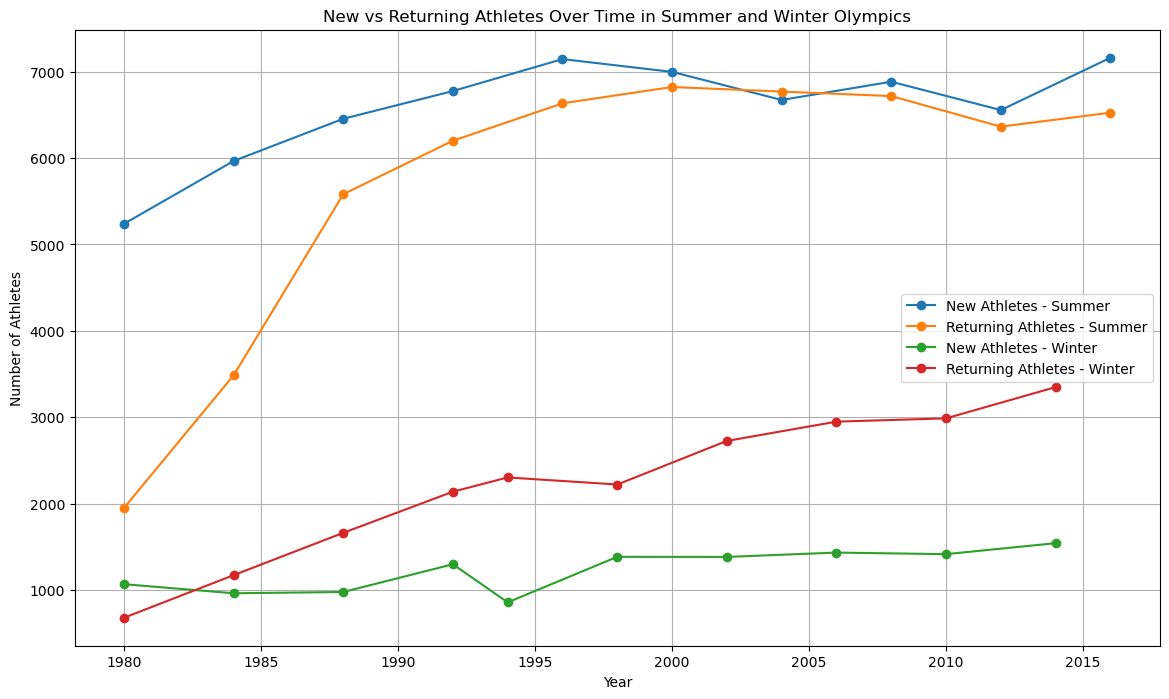

In [33]:
# Step 1: Create the 'is_new' column using .loc to avoid the SettingWithCopyWarning
filtered_data = filtered_data.copy()  # Ensure that filtered_data is a copy to avoid warnings
filtered_data.loc[:, 'is_new'] = ~filtered_data.duplicated(subset=['Name'], keep='first')

# Step 2: Create the 'Athlete_Type' column using .loc
filtered_data.loc[:, 'Athlete_Type'] = filtered_data['is_new'].apply(lambda x: 'Returning' if not x else 'New')

# Step 3: Group the data by Year, Season, and Athlete_Type, then count the number of occurrences
agg_df = filtered_data.groupby(['Year', 'Season', 'Athlete_Type']).size().unstack(fill_value=0).reset_index()

# Step 4: Create a line plot for each Season (Summer and Winter)
plt.figure(figsize=(14, 8))

# Plot for Summer season
plt.plot(agg_df[agg_df['Season'] == 'Summer']['Year'], agg_df[agg_df['Season'] == 'Summer']['New'], label='New Athletes - Summer', marker='o')
plt.plot(agg_df[agg_df['Season'] == 'Summer']['Year'], agg_df[agg_df['Season'] == 'Summer']['Returning'], label='Returning Athletes - Summer', marker='o')

# Plot for Winter season
plt.plot(agg_df[agg_df['Season'] == 'Winter']['Year'], agg_df[agg_df['Season'] == 'Winter']['New'], label='New Athletes - Winter', marker='o')
plt.plot(agg_df[agg_df['Season'] == 'Winter']['Year'], agg_df[agg_df['Season'] == 'Winter']['Returning'], label='Returning Athletes - Winter', marker='o')

# Customize the plot
plt.title('New vs Returning Athletes Over Time in Summer and Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend()
plt.grid(True)
plt.savefig("output_data/fig16.png")
plt.show()

## Top 10 Sports Analysis

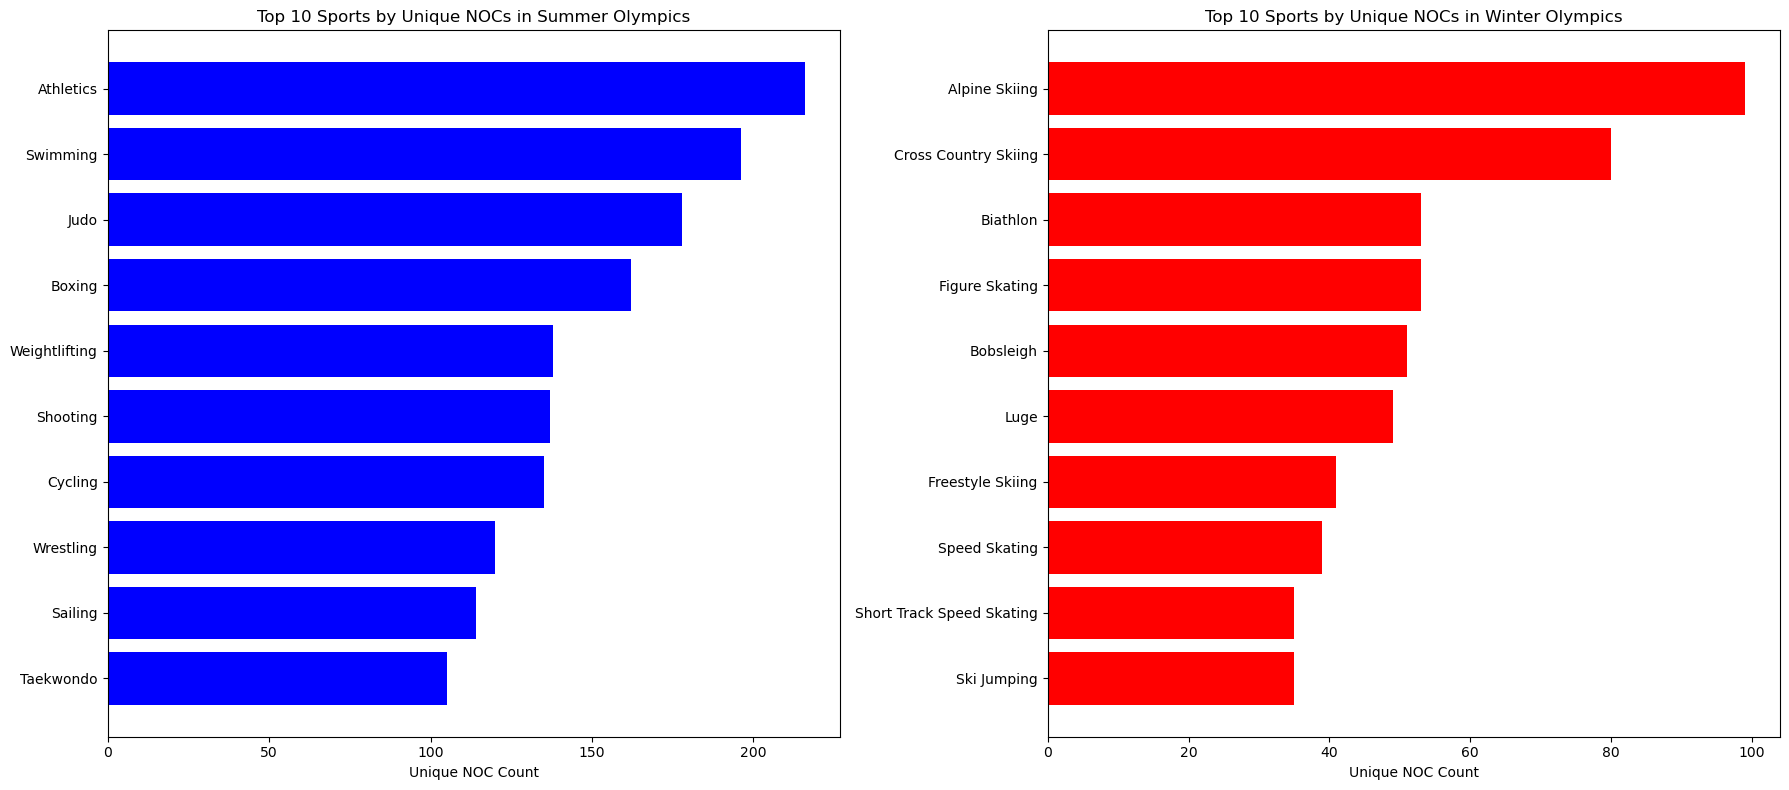

In [34]:
# Define a function to process the data and extract top 10 sports by unique NOCs
def get_top_sports_by_noc(filtered_data, season, top_n=10):
    # Filter the data for the specified season
    season_data = filtered_data[filtered_data['Season'] == season]

    # Group by Sport and count unique NOCs
    sport_noc_counts = season_data.groupby('Sport')['NOC'].nunique().reset_index(name='Unique NOC Count')

    # Sort by the count of unique NOCs in descending order and get the top N sports
    top_sports = sport_noc_counts.nlargest(top_n, 'Unique NOC Count')

    return top_sports

# Get the top 10 sports for both Summer and Winter Olympics
top_10_summer_sports = get_top_sports_by_noc(filtered_data, 'Summer', top_n=10)
top_10_winter_sports = get_top_sports_by_noc(filtered_data, 'Winter', top_n=10)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Summer Olympics
ax[0].barh(top_10_summer_sports['Sport'], top_10_summer_sports['Unique NOC Count'], color='blue')
ax[0].set_title('Top 10 Sports by Unique NOCs in Summer Olympics')
ax[0].set_xlabel('Unique NOC Count')
ax[0].invert_yaxis()  # Invert y-axis to have the top sport at the top

# Plot for Winter Olympics
ax[1].barh(top_10_winter_sports['Sport'], top_10_winter_sports['Unique NOC Count'], color='red')
ax[1].set_title('Top 10 Sports by Unique NOCs in Winter Olympics')
ax[1].set_xlabel('Unique NOC Count')
ax[1].invert_yaxis()  
# Invert y-axis to have the top sport at the top
plt.savefig("output_data/fig8.png")

# Display the plot
plt.tight_layout()
plt.show()

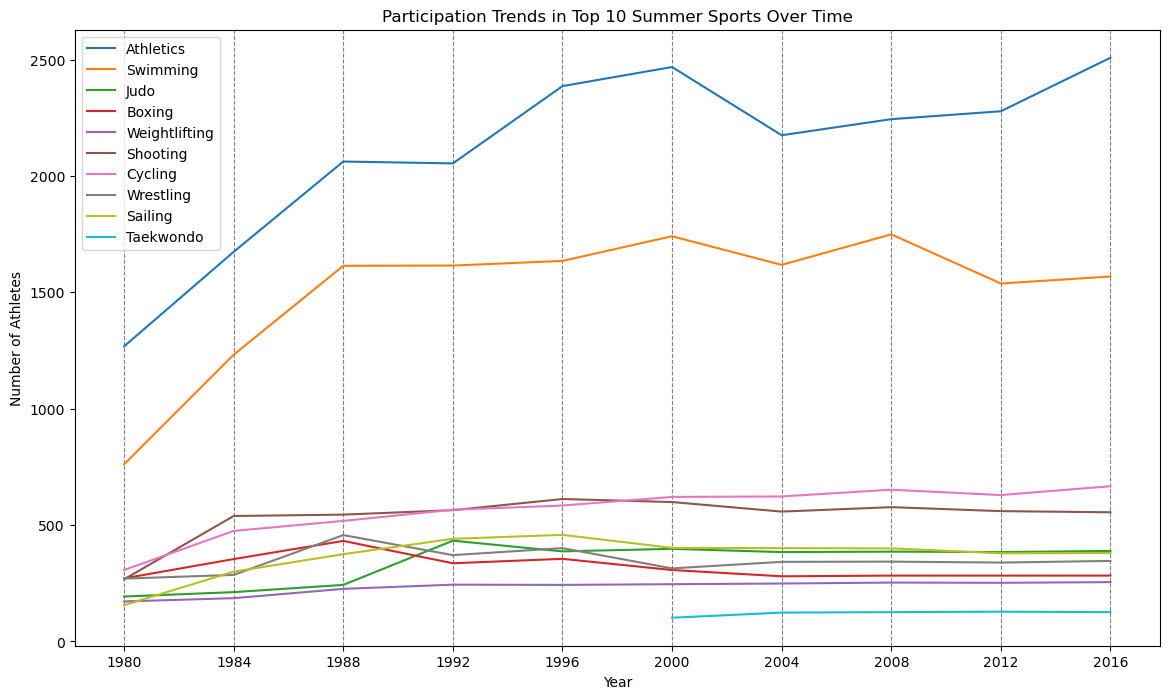

In [35]:
# Group by Year and Sport to get the number of athletes participating in each sport
sport_yearly_counts = filtered_data.groupby(['Year', 'Sport']).size().reset_index(name='Athlete Count')

# Plot participation trends for the top 10 summer sports
top_sports = top_10_summer_sports['Sport'].tolist()

plt.figure(figsize=(14, 8))

for sport in top_sports:
    sport_data = sport_yearly_counts[sport_yearly_counts['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Athlete Count'], label=sport)

plt.title('Participation Trends in Top 10 Summer Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
plt.xticks(range(1980, sport_data['Year'].max() + 1, 4))  # Set x-axis ticks every 4 years
plt.savefig("output_data/fig9.png")
plt.show()

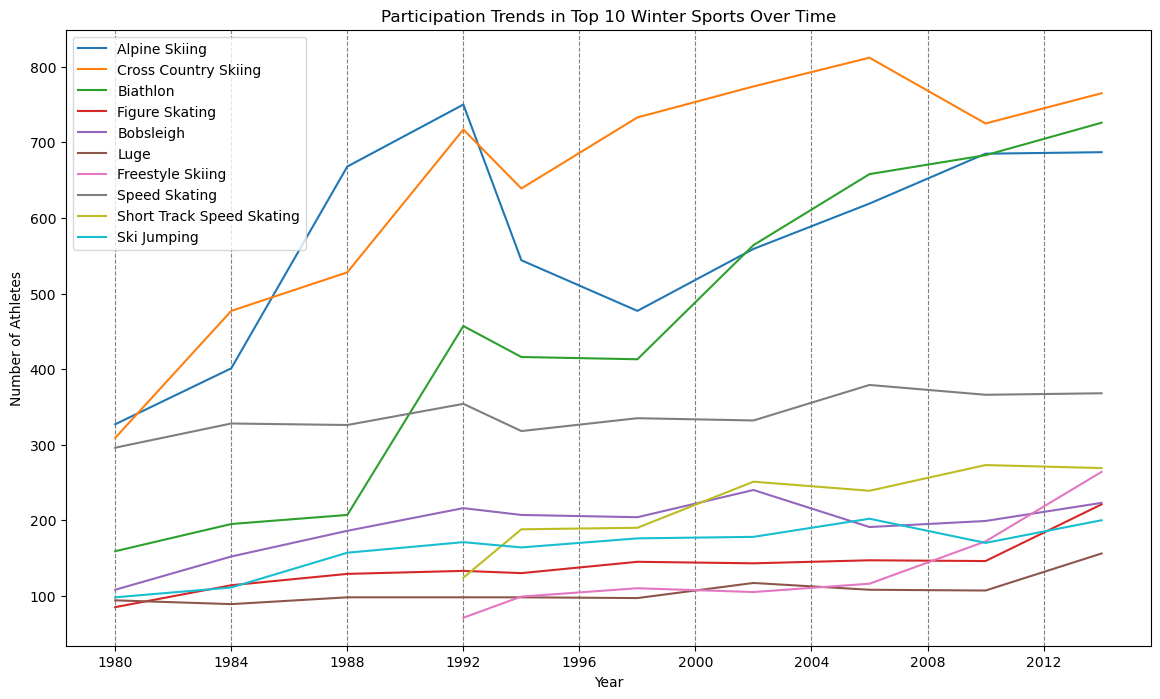

In [36]:
# Group by Year and Sport to get the number of athletes participating in each sport
sport_yearly_counts = filtered_data.groupby(['Year', 'Sport']).size().reset_index(name='Athlete Count')

# Plot participation trends for the top 10 winter sports
top_sports = top_10_winter_sports['Sport'].tolist()

plt.figure(figsize=(14, 8))

for sport in top_sports:
    sport_data = sport_yearly_counts[sport_yearly_counts['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Athlete Count'], label=sport)

plt.title('Participation Trends in Top 10 Winter Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
plt.xticks(range(1980, sport_data['Year'].max() + 1, 4))  # Set x-axis ticks every 4 years
plt.savefig("output_data/fig10.png")
plt.show()

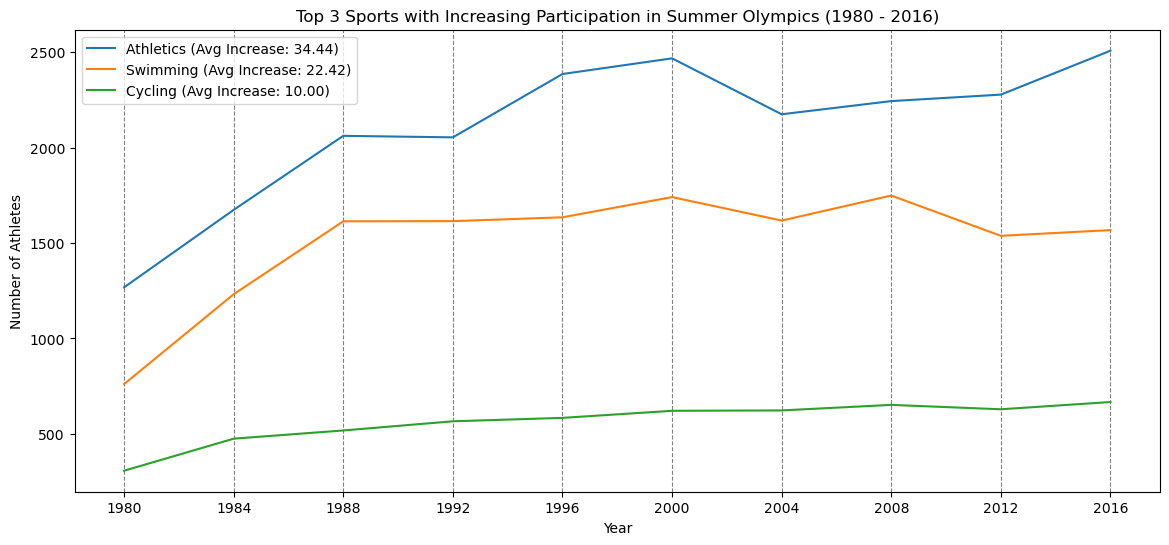

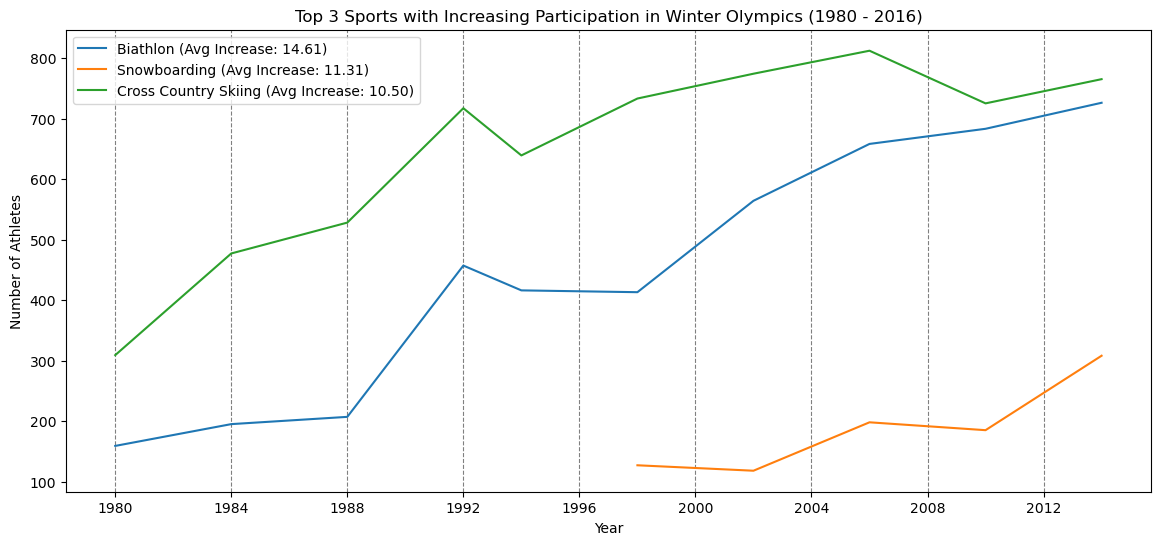

In [37]:
# Function to calculate the average annual increase in participation for each sport
def calculate_average_increase(sport_data):
    # Sort by Year to ensure chronological order
    sport_data = sport_data.sort_values(by='Year')

    # Calculate the difference in Athlete Count between consecutive years
    sport_data['Count Diff'] = sport_data['Athlete Count'].diff()

    # Calculate the number of years between each entry
    sport_data['Year Diff'] = sport_data['Year'].diff()

    # Calculate the rate of increase (Count Diff / Year Diff)
    sport_data['Rate of Increase'] = sport_data['Count Diff'] / sport_data['Year Diff']

    # Calculate the average rate of increase, ignoring NaN values
    avg_increase = sport_data['Rate of Increase'].mean()

    return avg_increase

# Function to get the top 3 sports with the most significant increase in participation
def get_top_increasing_sports(season_data, top_n=3):
    trend_data = []

    for sport in season_data['Sport'].unique():
        sport_data = season_data[season_data['Sport'] == sport]
        avg_increase = calculate_average_increase(sport_data)
        trend_data.append((sport, avg_increase))

    # Sort by average increase in descending order
    trend_data = sorted(trend_data, key=lambda x: x[1], reverse=True)

    # Return the top N sports with the highest average increase
    return trend_data[:top_n]

# Separate data for Summer and Winter Olympics
summer_sport_data = filtered_data[filtered_data['Season'] == 'Summer'].groupby(['Year', 'Sport']).size().reset_index(name='Athlete Count')
winter_sport_data = filtered_data[filtered_data['Season'] == 'Winter'].groupby(['Year', 'Sport']).size().reset_index(name='Athlete Count')

# Get the top 3 increasing sports for Summer and Winter Olympics
top_summer_sports = get_top_increasing_sports(summer_sport_data, top_n=3)
top_winter_sports = get_top_increasing_sports(winter_sport_data, top_n=3)

# Plot the trends for the top 3 Summer sports
plt.figure(figsize=(14, 6))
for sport, avg_increase in top_summer_sports:
    sport_data = summer_sport_data[summer_sport_data['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Athlete Count'], label=f'{sport} (Avg Increase: {avg_increase:.2f})')

plt.title('Top 3 Sports with Increasing Participation in Summer Olympics (1980 - 2016)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
plt.xticks(range(1980, sport_data['Year'].max() + 1, 4))  # Set x-axis ticks every 4 years
plt.savefig("output_data/fig11.png")
plt.show()

# Plot the trends for the top 3 Winter sports
plt.figure(figsize=(14, 6))
for sport, avg_increase in top_winter_sports:
    sport_data = winter_sport_data[winter_sport_data['Sport'] == sport]
    plt.plot(sport_data['Year'], sport_data['Athlete Count'], label=f'{sport} (Avg Increase: {avg_increase:.2f})')

plt.title('Top 3 Sports with Increasing Participation in Winter Olympics (1980 - 2016)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(loc='best')
plt.grid(True, which='both', axis='x', linestyle='--', color='gray')
plt.xticks(range(1980, sport_data['Year'].max() + 1, 4))  # Set x-axis ticks every 4 years
plt.savefig("output_data/fig12.png")
plt.show()

## Medal Analysis

In [38]:
filtered_data = merged_data[(merged_data['Year'] >= 1980) & (merged_data['Year'] <= 2016)]
medal_data = filtered_data[filtered_data['Medal'] != 'None']
# Pivot table to count medals by country (region) and medal type
medal_counts = medal_data.pivot_table(index='region', columns='Medal', aggfunc='size', fill_value=0)
medal_counts = medal_counts.reindex(columns=['Gold', 'Silver', 'Bronze'], fill_value=0)
medal_counts['Total'] = medal_counts['Gold'] + medal_counts['Silver'] + medal_counts['Bronze']
#Top 10 countries by total medal count
top_10_medal_counts = medal_counts.sort_values(by='Total', ascending=False).head(10)
top_10_medal_counts.to_csv("output_data/top_10_medal_counts.csv", index_label="Medal region")
print(top_10_medal_counts)

Medal        Gold  Silver  Bronze  Total
region                                  
USA          1287     828     671   2786
Russia        924     685     736   2345
Germany       766     672     682   2120
China         351     349     293    993
Australia     263     327     399    989
Canada        313     289     262    864
Italy         207     244     293    744
UK            238     233     268    739
France        220     215     278    713
Netherlands   199     220     203    622


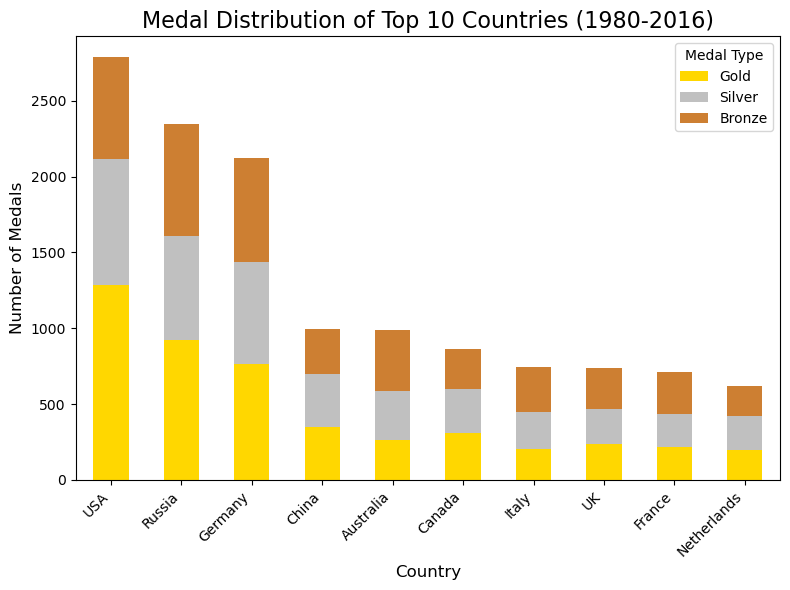

In [39]:
# The distribution of medals for the top 10 countries
top_10_medal_counts[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FFD700', '#C0C0C0', '#CD7F32'])

# Title and labels
plt.title('Medal Distribution of Top 10 Countries (1980-2016)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Medal Type')


# Show the plot
plt.savefig("output_data/fig13.png")
plt.tight_layout()
plt.show()

## Summer and Winter Medals Comparison

In [40]:
# Filer Summer and Winter Medal Data
Olympicsfrom1980_Summer = Olympicsfrom1980[Olympicsfrom1980['Season'] == 'Summer']
summer_gold_medals_df = Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Gold']
summer_silver_medals_df = Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Silver']
summer_bronze_medals_df = Olympicsfrom1980_Summer[Olympicsfrom1980_Summer['Medal'] == 'Bronze']

Olympicsfrom1980_Winter = Olympicsfrom1980[Olympicsfrom1980['Season'] == 'Winter']
winter_gold_medals_df = Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Gold']
winter_silver_medals_df = Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Silver']
winter_bronze_medals_df = Olympicsfrom1980_Winter[Olympicsfrom1980_Winter['Medal'] == 'Bronze']

# Count gold medals for Summer Olympics
summer_gold_medals_counts = summer_gold_medals_df['NOC'].value_counts().reset_index()
summer_gold_medals_counts.columns = ['NOC', 'Summer Gold Medals']

# Count gold medals for Winter Olympics
winter_gold_medals_counts = winter_gold_medals_df['NOC'].value_counts().reset_index()
winter_gold_medals_counts.columns = ['NOC', 'Winter Gold Medals']

# Combine the counts into a single DataFrame
combined_gold_medals = pd.merge(summer_gold_medals_counts, winter_gold_medals_counts, on='NOC', how='outer')
combined_gold_medals.fillna({'Summer Gold Medals': 0, 'Winter Gold Medals': 0}, inplace=True)

# Convert 'Summer Gold Medals' and 'Winter Gold Medals' to integers
combined_gold_medals['Summer Gold Medals'] = combined_gold_medals['Summer Gold Medals'].astype(int)
combined_gold_medals['Winter Gold Medals'] = combined_gold_medals['Winter Gold Medals'].astype(int)

# Calculate the total number of gold medals per country
combined_gold_medals['Total Gold Medals'] = combined_gold_medals['Summer Gold Medals'] + combined_gold_medals['Winter Gold Medals']

# Convert 'Total Gold Medals' to integer type
combined_gold_medals['Total Gold Medals'] = combined_gold_medals['Total Gold Medals'].astype(int)

top_10_countries = combined_gold_medals.sort_values(by='Total Gold Medals', ascending=False).head(10)
top_10_countries.to_csv("output_data/top_10_countries.csv", index_label="NOC")

# Reset index for better readability
top_10_countries.reset_index(drop=True, inplace=True)
top_10_countries


,NOC,Summer Gold Medals,Winter Gold Medals,Total Gold Medals
0,USA,1179,108,1287
1,GER,331,133,464
2,URS,321,87,408
3,RUS,295,94,389
4,CHN,334,16,350
5,CAN,81,232,313
6,AUS,258,5,263
7,GBR,228,10,238
8,GDR,194,39,233
9,FRA,198,22,220


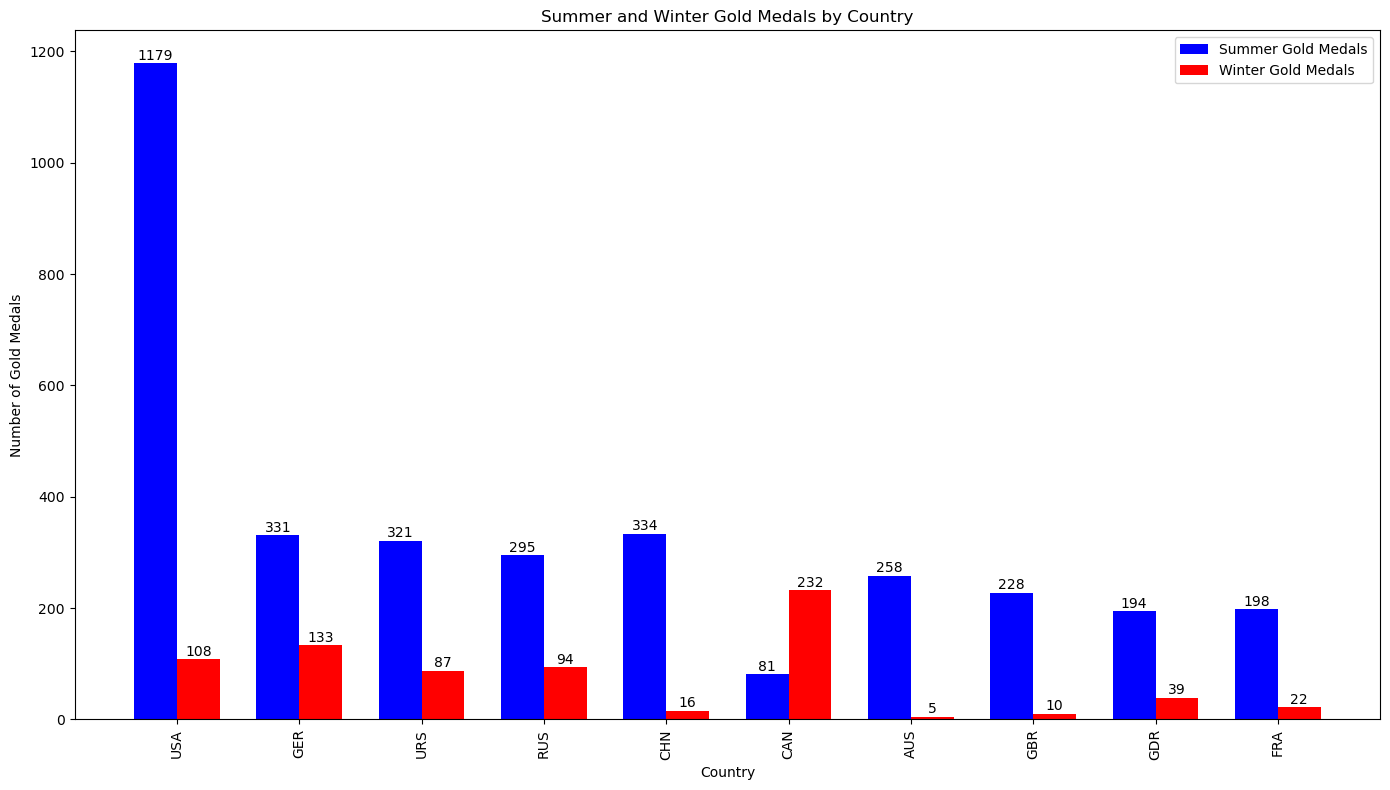

In [41]:
# Create Bar Chart for Top 10 Countries

x = np.arange(len(top_10_countries['NOC']))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot Summer Gold Medals
bars1 = ax.bar(x - width/2, top_10_countries['Summer Gold Medals'], width, label='Summer Gold Medals', color='blue')

# Plot Winter Gold Medals
bars2 = ax.bar(x + width/2, top_10_countries['Winter Gold Medals'], width, label='Winter Gold Medals', color='red')

# Add text for each bar
for i in range(len(x)):
    # Summer Gold Medals
    ax.text(x[i] - width/2, top_10_countries['Summer Gold Medals'][i] + 1,  # Adjust text position
            f'{top_10_countries["Summer Gold Medals"][i]}', 
            ha='center', va='bottom', color='black')
    # Winter Gold Medals
    ax.text(x[i] + width/2, top_10_countries['Winter Gold Medals'][i] + 1, 
            f'{top_10_countries["Winter Gold Medals"][i]}', 
            ha='center', va='bottom', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Number of Gold Medals')
ax.set_title('Summer and Winter Gold Medals by Country')
ax.set_xticks(x)
ax.set_xticklabels(top_10_countries['NOC'], rotation=90)
ax.legend()

# Display the plot
plt.savefig("output_data/fig14.png")
plt.tight_layout()
plt.show()

## How a Country Performed While Hosting Vs Not Hosting

<Figure size 1200x800 with 0 Axes>

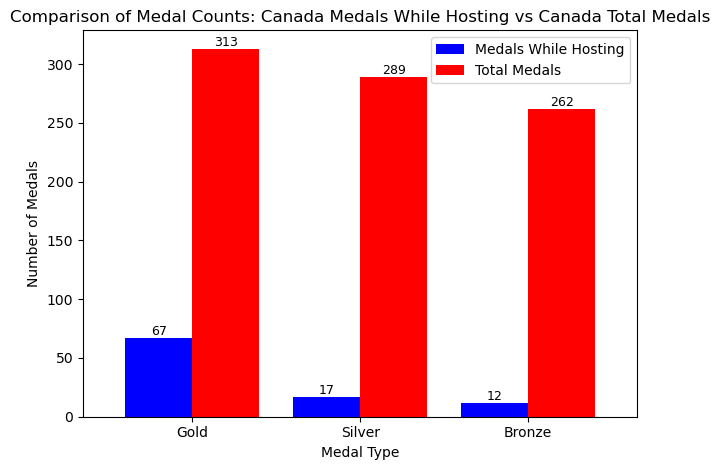

In [42]:
# Filter to find the Countries that Hosted Olympics

unique_cities = Olympicsfrom1980['City'].unique()
hosting_countries = ["ESP", "GBR", "CAN", "FRA", "NOR", "USA", "AUS", "EUN", "JPN", "ITA", "CHN", "BRA", "GRE", "YUG", "KOR"]
hosting_countries_df = Olympicsfrom1980[Olympicsfrom1980['NOC'].isin(hosting_countries)]

# Canada Hosting Data
Canada_Data = hosting_countries_df[hosting_countries_df['NOC'] == 'CAN']
Canada_Hosting = Canada_Data[Canada_Data['City'].isin(['Calgary', 'Vancouver'])]
Canada_Hosting_Medals = Canada_Hosting['Medal'].value_counts()
Canada_Data_Total_Medals = Olympicsfrom1980[Olympicsfrom1980['NOC'] == 'CAN']['Medal'].value_counts()

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Medals While Hosting': Canada_Hosting_Medals,
    'Total Medals': Canada_Data_Total_Medals
}).fillna(0)  # Fill NaN values with 0 for missing medal types

# Plotting
plt.figure(figsize=(12, 8))
ax = comparison_df.plot(kind='bar', width=0.8, color=['blue', 'red'])

# Add labels and title
plt.xlabel('Medal Type')
plt.ylabel('Number of Medals')
plt.title('Comparison of Medal Counts: Canada Medals While Hosting vs Canada Total Medals')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add numbers to bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

# Show plot
plt.savefig("output_data/fig15.png")
plt.tight_layout()
plt.show()